In [17]:
from ultralytics import YOLO
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os
os.environ['PATH'] += r'C:\ProgramFiles\Tesseract-OCR'
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [46]:
# Function to convert class labels to human-readable form
def label_cvt(n):
    if n == 0:
        return 'Board'
    elif n == 1:
        return 'Class'
    else:
        return 'Name'

In [48]:
img_path = './photo.png'
model = YOLO('./runs/detect/train/weights/best.pt')

In [57]:
img = cv2.imread(img_path)
    
# Use the YOLO model to make predictions
results = model.predict(img)


0: 800x576 1 10th, 1 Board, 1 Name, 790.4ms
Speed: 11.3ms preprocess, 790.4ms inference, 0.0ms postprocess per image at shape (1, 3, 800, 576)


In [58]:
# Dictionary to store the highest confidence prediction for each class
highest_confidence_per_class = {}
    
# Process the results to keep only the highest confidence prediction for each class
for r in results:
    for id in range(len(r)):
        class_id = int(r.boxes.cls[id].numpy().astype(int))
        confidence = r.boxes.conf[id].numpy().astype(float)
        box = r.boxes.xyxy.cpu().numpy().astype(int)[id]

        if class_id not in highest_confidence_per_class or confidence > highest_confidence_per_class[class_id]['confidence']:
            highest_confidence_per_class[class_id] = {
            'confidence': confidence,
                'box': box
            }

In [56]:
# Dictionary to store the extracted text for each class
text = {}
    
# Process the image regions corresponding to the highest confidence predictions
for class_id, pred in highest_confidence_per_class.items():
    x, y, x1, y1 = pred['box']
    roi = img[y:y1, x:x1]
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            
            # Use Tesseract to extract text from the region of interest
    extracted_text = pytesseract.image_to_string(gray_roi, lang='eng',
                                    config='--psm 10 --oem 3 -c tessedit_char_whitelist= "QWERTYUIOPASDFGHJKLZXCVBNM,"')
    text[label_cvt(class_id)] = extracted_text.strip()

In [85]:
# Check if the document is a Secondary School Leaving Certificate and return the extracted name
if text['Board'] == 'SECONDARY SCHOOL LEAVING CERTIFICATE':
    print("Extracted Name:",text['Name'])

Extracted Name: SHAFEEQ AHAMED S


Text(0.5, 1.0, 'STATE BOARD OF SCHOOL EXAMINATIONS, TAMILNADU')

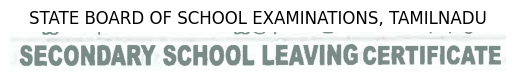

In [79]:
x, y, x1, y1 = highest_confidence_per_class[0]['box']
roi = img[y:y1, x:x1]
plt.imshow(roi)
plt.axis('off')
plt.title(text['Class'])

Text(0.5, 1.0, 'SECONDARY SCHOOL LEAVING CERTIFICATE')

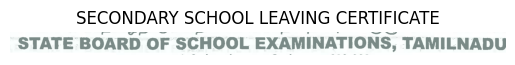

In [81]:
x, y, x1, y1 = highest_confidence_per_class[1]['box']
roi = img[y:y1, x:x1]
plt.imshow(roi)
plt.axis('off')
plt.title(text['Board'])

Text(0.5, 1.0, 'SHAFEEQ AHAMED S')

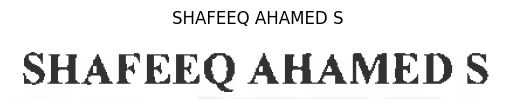

In [83]:
x, y, x1, y1 = highest_confidence_per_class[2]['box']
roi = img[y:y1, x:x1]
plt.imshow(roi)
plt.axis('off')
plt.title(text['Name'])